<h2 style="text-align: center;"><strong>Segment 1: Eigendecomposition</strong></h2>

* Affine Transformation via Matrix Application
* Eigenvectors and Eigenvalues
* Matrix Determinants
* Eigendecomposition of a Matrix

---

In [13553]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import tensorflow as tf

## **Affine Transformation via Matrix Application**

*Let's say we have a vector $v$:*

In [13554]:
v = np.array([3, 1])
v

array([3, 1])

**Let's plot $v$ using my **plot_vectors()** function (which is based on Hadrien Jean's plotVectors() function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE))**

In [13555]:
def plot_vectors(vectors, colors):
    plt.figure()
    plt.axvline(0, color='lightgray')
    plt.axhline(0, color='lightgray')

    for (x, y), color in zip(vectors, colors):
        plt.quiver(0, 0, x, y,
                   angles='xy',
                   scale_units='xy',
                   scale=1,
                   color=color)

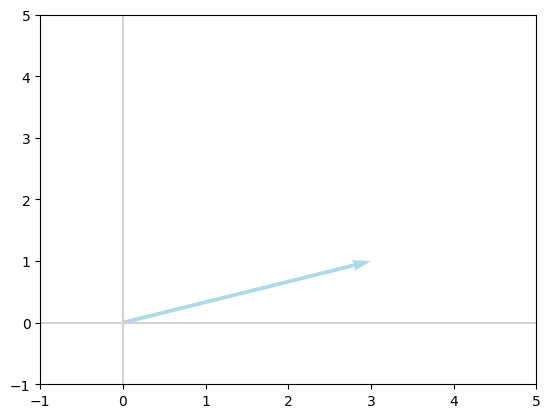

In [13556]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.show()

*Matrix-vector multiplication linearly transforms a vector—except for the identity matrix, which leaves the vector unchanged.*

In [13557]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [13558]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [13559]:
v == Iv

array([ True,  True])

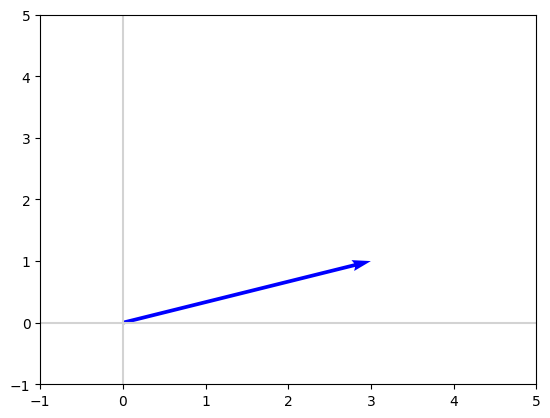

In [13560]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.show()

*In contrast, consider the matrix $E$ that flips vectors over the $x$-axis*

In [13561]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [13562]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

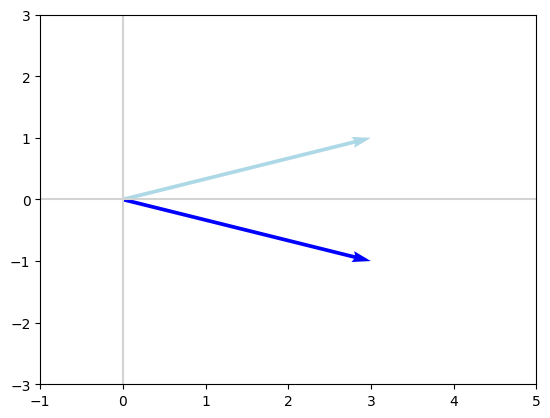

In [13563]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

*Alternatively, the matrix $F$ reflects vectors over the $y$-axis*

In [13564]:
F = np.array([[-1, 0], [0, 1]])
F 

array([[-1,  0],
       [ 0,  1]])

In [13565]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

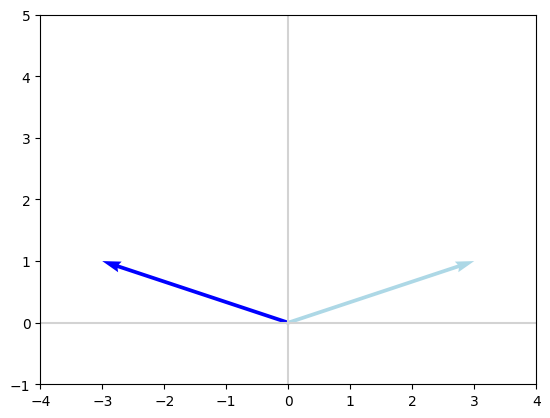

In [13566]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
plt.ylim(-1, 5)
plt.show()

*Applying a flipping matrix is an example of an **affine transformation**—a geometric change that may alter distances or angles between vectors but preserves parallelism.*

Other common affine transformations include:  
- **Scaling**: changing the length of vectors  
- **Shearing**: distorting vectors along one axis  
- **Rotation**: turning vectors around a point or origin  

> See this [blog](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) post for a practical guide to affine transformations in Python, including applications to images and vectors.

*A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$*

In [13567]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [13568]:
Av = np.dot(A, v)
Av

array([1, 4])

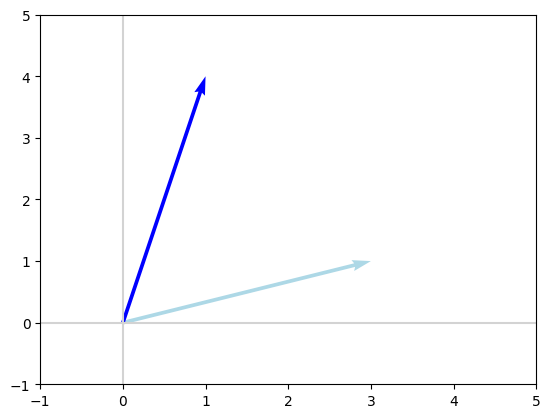

In [13569]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.show()

*Another example of applying $A$*

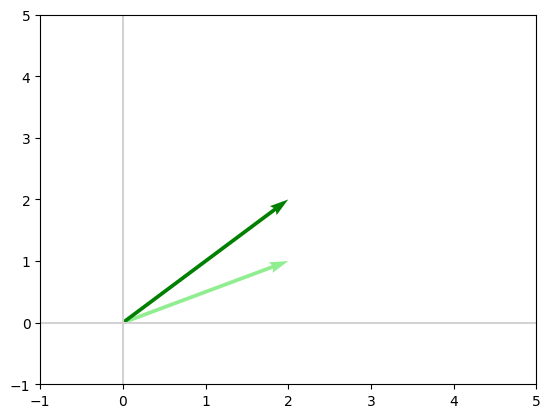

In [13570]:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.show()

*We can concatenate several vectors into a matrix $V$, where each column represents a separate vector. Any linear transformation applied to $V$ will then be applied independently to each column (vector)*

In [13571]:
v

array([3, 1])

**Recall:** *Convert an array to 2D to transpose it into a column.*

In [13572]:
np.matrix(v).T 

matrix([[3],
        [1]])

*Mirror image of v over both axes*

In [13573]:
v3 = np.array([-3, -1])
v4 = np.array([-1, 1])

In [13574]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [13575]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [13576]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

*Function to convert a matrix column into a 1D vector*

In [13577]:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [13578]:
vectorfy(V, 0)

array([3, 1])

In [13579]:
vectorfy(V, 0) == v

array([ True,  True])

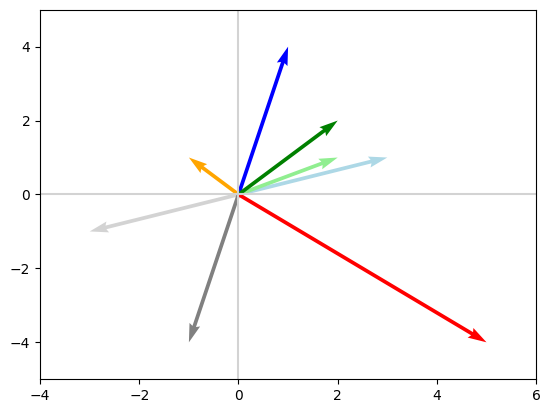

In [13580]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
plt.ylim(-5, 5)
plt.show()

> Now that we understand how matrices linearly transform vectors, let's move on to exploring eigenvectors and eigenvalues.

---

## **Eigenvectors and Eigenvalues**

**Eigenvector:** A **non-zero vector** $v$ whose direction remains unchanged under a **square matrix** $A$, satisfying

$$
A v = \lambda v
$$

**Eigenvalue:** A **scalar** $\lambda$ that scales its eigenvector.

**Understanding the Formula $A v = \lambda v$:**

- $A$ – a **square matrix** representing a linear transformation.  
- $v$ – a **non-zero eigenvector**, pointing in a direction preserved by $A$.  
- $\lambda$ – a **scalar eigenvalue**, showing how much $v$ is scaled.  

When $v$ is multiplied by $A$, the result $A v$ points in the **same direction** as $v$, but its **length is scaled by $\lambda$**:  

- $\lambda > 1$: stretched  
- $0 < \lambda < 1$: compressed  
- $\lambda < 0$: flipped and scaled  

This equation defines eigenvectors and eigenvalues: solving it for $\lambda$ gives eigenvalues, and solving for $v$ gives the corresponding eigenvectors. It is fundamental in **linear algebra**, **PCA**, **dimensionality reduction**, **stability analysis**, **quantum mechanics**, and machine learning.

**Key Points:**

- **Direction:** Eigenvectors preserve direction under $A$.  
- **Scaling:** Eigenvalues scale the eigenvector.  
- **Square matrices only:** Only $n \times n$ matrices have eigenvectors/eigenvalues.  
- **Higher Dimensions:** Eigenvectors are **1D invariant subspaces**; for tensors with extra outer dimensions (e.g., batches or channels), extract the innermost square matrix: $A = X[0,0]$.  
- **Eigenvalues:** Solve $\det(A - \lambda I) = 0$.  
- **Eigenvectors:** Solve $(A - \lambda I)v = 0$.  
- **Applications:** PCA, dimensionality reduction, stability analysis, spectral clustering, quantum mechanics, machine learning.

**Summary:**  
Eigenvectors indicate **invariant directions**, and eigenvalues their **scaling factors**, valid for all square matrices and any dimension.

##### **Eigenvectors and Eigenvalues in NumPy**

In [13581]:
A_np = np.array([[-1,4],[2,-2]])
A_np

array([[-1,  4],
       [ 2, -2]])

In [13582]:
Lambda_np, V_np = np.linalg.eig(A_np) 

*The matrix contains as many eigenvectors as there are columns of* `A_np`

In [13583]:
V_np

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

*Each eigenvector has a corresponding eigenvalue.*

In [13584]:
Lambda_np

array([ 1.37228132, -4.37228132])

**The first eigenvector corresponding to A_np**

In [13585]:
v1_np = V_np[:,0] 
v1_np

array([0.86011126, 0.51010647])

In [13586]:
lambda1_np = Lambda_np[0]
lambda1_np

np.float64(1.3722813232690143)

> Let's confirm that $Av = \lambda v$ for the first eigenvector

In [13587]:
Av1_np = np.dot(A_np, v1_np)
Av1_np

array([1.18031462, 0.70000958])

In [13588]:
lambda1_np * v1_np

array([1.18031462, 0.70000958])

> The first vector in the matrix satisfies:
>
> $A v = \lambda v$

**The second eigenvector corresponding to A_np**

In [13589]:
v2_np = V_np[:,1] 
v2_np

array([-0.76454754,  0.64456735])

In [13590]:
lambda2_np = Lambda_np[1]
lambda2_np

np.float64(-4.372281323269014)

> Let's confirm that $Av = \lambda v$ for the second eigenvector

In [13591]:
Av2_np = np.dot(A_np, v2_np)
Av2_np

array([ 3.34281692, -2.81822977])

In [13592]:
lambda2_np * v2_np

array([ 3.34281692, -2.81822977])

> The second vector in the matrix satisfies:
>
> $A v = \lambda v$

**Plotting the Eigenvector and Its Transformation**

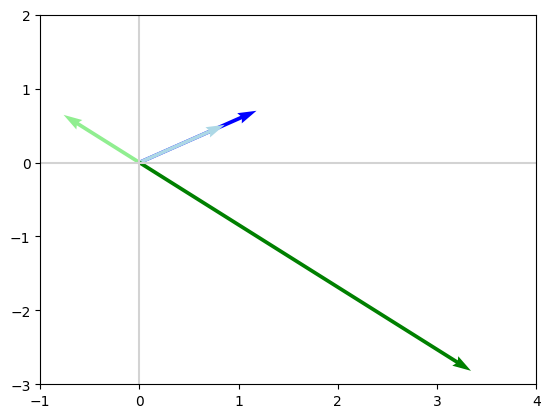

In [13593]:
plot_vectors([Av1_np, v1_np, Av2_np, v2_np], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
plt.ylim(-3, 2)
plt.show()

##### **Eigenvectors and Eigenvalues in PyTorch**

In [13594]:
A_pt = torch.tensor([[-1, 4], [2, -2]])
A_pt

tensor([[-1,  4],
        [ 2, -2]])

*PyTorch eigenvalue computation requires a float tensor*

In [13595]:
Lambda_pt, V_pt = torch.linalg.eig(A_pt.float())

*Complex-typed values with "0.j" imaginary part are in fact real numbers*

In [13596]:
V_pt

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

*Each eigenvector has a corresponding eigenvalue.*

In [13597]:
Lambda_pt

tensor([ 1.3723+0.j, -4.3723+0.j])

**The first eigenvector corresponding to A_pt**

In [13598]:
v1_pt = V_pt[:,0]
v1_pt

tensor([0.8601+0.j, 0.5101+0.j])

In [13599]:
lambda1_pt = Lambda_pt[0]

> Let's confirm that $Av = \lambda v$ for the first eigenvector

*Convert the eigenvector tensor to floating-point type for further computations*

In [13600]:
Av1_pt = torch.matmul(A_pt.float(), v1_pt.float()) 
Av1_pt

tensor([1.1803, 0.7000])

In [13601]:
lambda1_pt.float() * v1_pt.float()

tensor([1.1803, 0.7000])

> The first vector in the matrix satisfies:
>
> $A v = \lambda v$

**The second eigenvector corresponding to A_pt**

In [13602]:
v2_pt = V_pt[:,1]
v2_pt

tensor([-0.7645+0.j,  0.6446+0.j])

In [13603]:
lambda2_pt = Lambda_pt[1]
lambda2_pt

tensor(-4.3723+0.j)

> Let's confirm that $Av = \lambda v$ for the second eigenvector

*Convert the eigenvector tensor to floating-point type for further computations*

In [13604]:
Av2_pt = torch.matmul(A_pt.float(), v2_pt.float())
Av2_pt

tensor([ 3.3428, -2.8182])

In [13605]:
lambda2_pt.float() * v2_pt.float()

tensor([ 3.3428, -2.8182])

> The second vector in the matrix satisfies:
>
> $A v = \lambda v$

**Plotting the Eigenvector and Its Transformation**

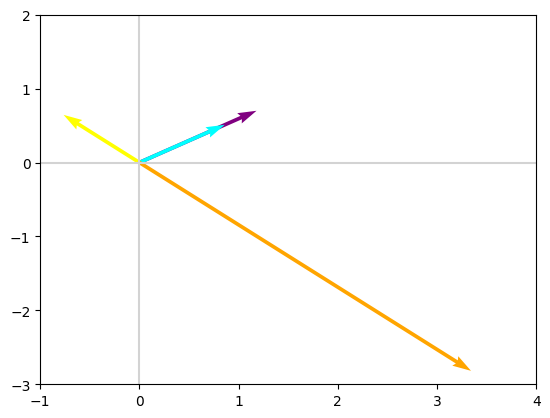

In [13606]:
plot_vectors([Av1_pt, v1_pt, Av2_pt, v2_pt], 
            ['purple', 'cyan', 'orange', 'yellow'])
plt.xlim(-1, 4)
plt.ylim(-3, 2)
plt.show()

---

## **Matrix Determinants**

The **determinant** is a scalar value that can be computed from a square matrix. It provides important information about the matrix, such as whether it is invertible and how it scales space.

##### **Key Concepts**

- **Square Matrix Only**: Determinants are defined only for square matrices (n × n).

- **Invertibility**: 
  - A matrix is **invertible** (non-singular) if its determinant is **non-zero**.
  - A matrix is **non-invertible** (singular) if its determinant is **zero**.

- **Geometric Interpretation**: 
  - In 2D or 3D, the absolute value of the determinant represents the **scaling factor** of the linear transformation defined by the matrix.
  - The sign indicates **orientation** (positive preserves orientation, negative reverses it).

- **Eigenvalues Connection**:
  - The determinant of a matrix equals the **product of its eigenvalues**.

- **Properties**:
  1. `det(A·B) = det(A) * det(B)`
  2. `det(Aᵀ) = det(A)`
  3. Multiplying a row by a scalar multiplies the determinant by that scalar.
  4. Swapping two rows changes the sign of the determinant.

- **Recursion / Expansion for Higher Dimensions**:
  - For matrices larger than 2×2, the determinant can be computed using **cofactor expansion** (Laplace expansion).  
  - This involves breaking the n×n matrix into smaller (n-1)×(n-1) matrices recursively until reaching 2×2 matrices.

##### **Summary**
The determinant is a fundamental scalar property of a square matrix that encodes **invertibility, scaling, and orientation**, is closely related to eigenvalues, and can be computed recursively for higher-dimensional matrices.

##### **Matrix Determinants in NumPy**

In [13607]:
X_np = np.array([[4, 2], [-5, -3]])
X_np

array([[ 4,  2],
       [-5, -3]])

In [13608]:
np.linalg.det(X_np)

np.float64(-2.0000000000000013)

> **X_np** is invertible (determinant ≠ 0)

In [13609]:
N_np = np.array([[-4, 1], [-8, 2]])
N_np

array([[-4,  1],
       [-8,  2]])

In [13610]:
np.linalg.det(N_np)

np.float64(0.0)

> **N_np** is singular (determinant = 0) and cannot be inverted

##### **Matrix Determinants in PyTorch**

*Tensors should use floating-point values rather than integers to ensure accurate computations.*

In [13611]:
X_pt = torch.tensor([[4, 2], [-5, -3.]])
X_pt

tensor([[ 4.,  2.],
        [-5., -3.]])

In [13612]:
torch.det(X_pt) 

tensor(-2.)

> **X_pt** is invertible (determinant ≠ 0)

In [13613]:
N_pt = torch.tensor([[-4, 1], [-8, 2.]])

In [13614]:
torch.det(N_pt) 

tensor(-0.)

> **N_pt** is singular (determinant = 0) and cannot be inverted

##### **Matrix Determinants in TensorFlow**

*Tensors should use floating-point values rather than integers to ensure accurate computations.*

In [13615]:
X_tf = tf.constant([[4, 2], [-5, -3.]])
X_tf

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 4.,  2.],
       [-5., -3.]], dtype=float32)>

In [13616]:
tf.linalg.det(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.000000476837158>

> **X_tf** is invertible (determinant ≠ 0)

In [13617]:
N_tf = tf.constant([[-4, 1], [-8, 2.]])
N_tf

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-4.,  1.],
       [-8.,  2.]], dtype=float32)>

In [13618]:
tf.linalg.det(N_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

> **N_tf** is singular (determinant = 0) and cannot be inverted

##### **Relationship Between Determinants and Eigenvalues**

*For any square matrix, the product of its eigenvalues is equal to its determinant.*

In [13619]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

*The determinant of the 3×3 matrix **X***

In [13620]:
det_X = np.linalg.det(X)
det_X

np.float64(19.999999999999996)

*Extraction of the eigenvalues of **X***

In [13621]:
Lambda_np1, V_np1 = np.linalg.eig(X)
Lambda_np1

array([-3.25599251, -1.13863631,  5.39462882])

*Eigenvalue product*

In [13622]:
product_eigen_X = np.prod(Lambda_np1)
product_eigen_X

np.float64(19.99999999999999)

**np.isclose(a, b)** *returns True if a and b are approximately equal, making it ideal for floating-point comparisons*

In [13623]:
Equal = np.isclose(det_X,product_eigen_X)
print(Equal)

True


> Thus, we have demonstrated that a matrix’s determinant is equal to the product of its eigenvalues.

$|\text{det}(X)|$ *is the absolute value of the determinant.*

In [13624]:
np.abs(np.linalg.det(X))

np.float64(19.999999999999996)

*Let's use a matrix $B$, which is composed of basis vectors, to explore the impact of applying matrices with varying $|\text{det}(X)|$ values*

In [13625]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

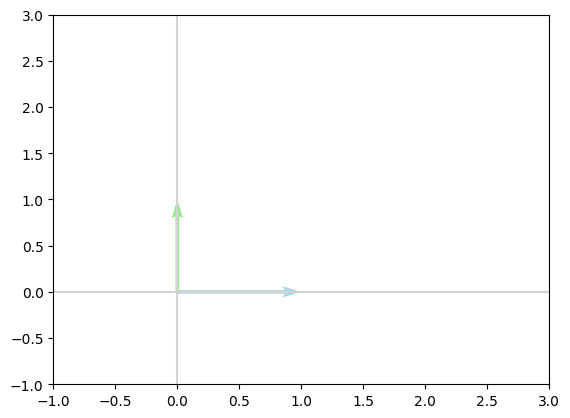

In [13626]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.show()

*Let's start by applying the matrix $N$ to $B$, recalling from earlier that $N$ is singular*

In [13627]:
N_np

array([[-4,  1],
       [-8,  2]])

In [13628]:
np.linalg.det(N_np)

np.float64(0.0)

In [13629]:
NB = np.dot(N_np, B)
NB

array([[-4,  1],
       [-8,  2]])

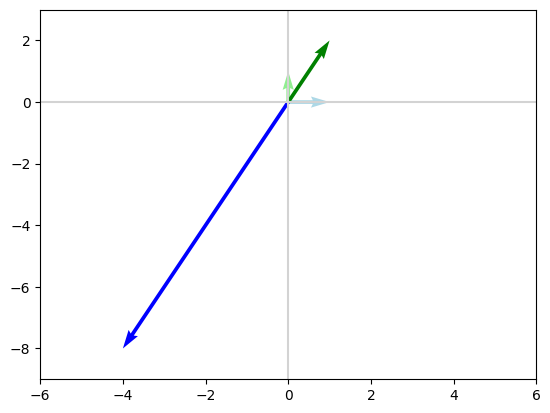

In [13630]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
plt.ylim(-9, 3)
plt.show()

In [13631]:
Lambda, V = np.linalg.eig(N_np)
Lambda

array([-2.,  0.])

*If any eigenvalue of a matrix is zero, then the product of its eigenvalues becomes zero, and therefore the determinant must also be zero.*

*Now let's try applying $I_2$ to $B$* 

In [13632]:
I

array([[1, 0],
       [0, 1]])

*Determinant*

In [13633]:
np.linalg.det(I)

np.float64(1.0)

*Eigenvalues*

In [13634]:
Lambda, V = np.linalg.eig(I)
Lambda

array([1., 1.])

In [13635]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

**Visualizing the Effect of Matrix $I$ on Basis Vector**

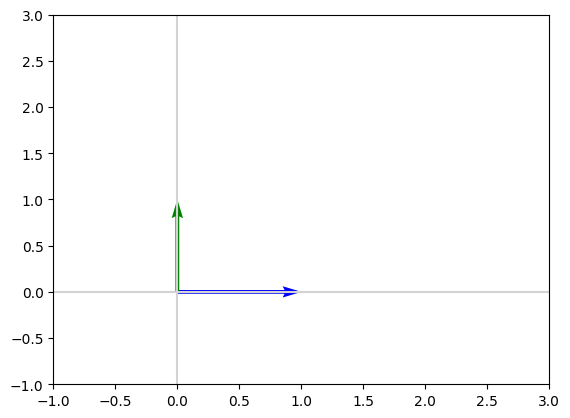

In [13636]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.show()

*Rather than the identity matrix, consider the matrix $J$, which yields more informative behavior*

In [13637]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

*Determinant*

In [13638]:
np.linalg.det(J)

np.float64(-1.0)

*The absolute value of the determinant indicates how the matrix scales area or volume, ignoring orientation.*

In [13639]:
np.abs(np.linalg.det(J))

np.float64(1.0)

*Eigenvalues*

In [13640]:
Lambda, V = np.linalg.eig(J)
Lambda

array([-0.5,  2. ])

In [13641]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

**Visualizing the Effect of Matrix $J$ on Basis Vector**

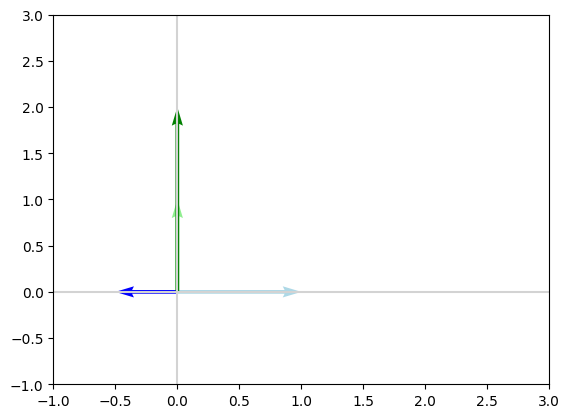

In [13642]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.show()

*Finally, let's apply the matrix $D$, which scales vectors by doubling along both the $x$ and $y$ axes*

In [13643]:
D = I*2
D

array([[2, 0],
       [0, 2]])

*Determinant*

In [13644]:
np.linalg.det(D)

np.float64(4.0)

*Eigenvalues*

In [13645]:
Lambda, V = np.linalg.eig(D)
Lambda

array([2., 2.])

In [13646]:
DB = np.dot(D, B)
DB

array([[2, 0],
       [0, 2]])

**Visualizing the Effect of Matrix $D$ on Basis Vector**

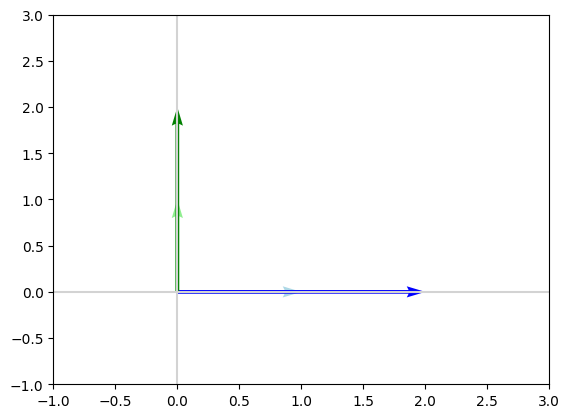

In [13647]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.show()

---

## **Eigendecomposition of a Matrix**

*The **eigendecomposition** (or spectral decomposition) of a square matrix $A \in \mathbb{R}^{n \times n}$ expresses the matrix in terms of its eigenvectors and eigenvalues. It is a powerful tool for understanding linear transformations and simplifying matrix operations.*

For a diagonalizable matrix $A$, the eigendecomposition is:

$A = V \Lambda V^{-1}$

Where:  

- $V$ is the square matrix whose columns are the **eigenvectors** of $A$:  
  $V = [v_1, v_2, \dots, v_n]$  
  Each column $v_i$ satisfies $A v_i = \lambda_i v_i$.

- $\Lambda$ is a **diagonal matrix** of the eigenvalues of $A$:  
  $\Lambda = \text{diag}(\lambda_1, \lambda_2, \dots, \lambda_n)$  
  By convention, eigenvalues are often arranged in **descending order**, so $\lambda_1$ and $v_1$ may represent the primary characteristic of $A$.

### **Key Concepts:**

- **Existence**:  
  - Eigendecomposition exists if $A$ is **diagonalizable**, i.e., it has $n$ linearly independent eigenvectors.  
  - Some matrices (defective matrices) are **not diagonalizable**.

- **Diagonalization**:  
  - In the eigenvector basis, $A$ becomes diagonal:  
    $V^{-1} A V = \Lambda$  
  - Powers of $A$ can be computed easily:  
    $A^k = V \Lambda^k V^{-1}$

- **Determinant and Trace**:  
  - $\det(A) = \prod_{i=1}^{n} \lambda_i$  
  - $\text{tr}(A) = \sum_{i=1}^{n} \lambda_i$

- **Symmetric Matrices**:  
  - If $A = A^T$, eigenvectors can be chosen to be **orthonormal**, i.e., $V^{-1} = V^T$.

### **Applications of Eidendecomposition:**

- **Principal Component Analysis (PCA)**
  - **Purpose**: Dimensionality reduction by projecting data onto directions of maximum variance.  
  - **How**: Compute the covariance matrix of the dataset and perform eigendecomposition. Eigenvectors represent principal components, and eigenvalues represent the variance along each component.  
  - **Example**: In a dataset with multiple features, projecting data onto the eigenvectors corresponding to the largest eigenvalues captures most of the variability while reducing dimensionality.

- **Solving Linear Differential Equations**
  - **Purpose**: Simplify systems of linear differential equations.  
  - **How**: Diagonalizing the coefficient matrix $A$ allows solving $dx/dt = Ax$ as independent scalar equations along eigenvectors.  
  - **Example**: The solution can be expressed as
  $$
  x(t) = V \, e^{\Lambda t} \, V^{-1} x(0)
  $$ 
  
- **Matrix Powers and Exponentials**
  - **Purpose**: Efficient computation of $A^k$ or $e^{At}$.  
  - **How**:  
  $$
  A^k = V \Lambda^k V^{-1}, \quad e^{At} = V e^{\Lambda t} V^{-1}
  $$
  - **Benefit**: Only need to exponentiate or raise diagonal entries, simplifying calculations significantly.

- **Graph Theory and Spectral Clustering**
  - **Purpose**: Analyze graphs using eigenvalues of adjacency or Laplacian matrices.  
  - **How**: Eigenvectors corresponding to small eigenvalues of the Laplacian reveal clusters or communities within the graph.

- **Stability Analysis in Systems**
  - **Purpose**: Determine stability of linear systems.  
  - **How**: Eigenvalues of the system matrix indicate whether trajectories grow, decay, or oscillate.  
    - $|\lambda_i| < 1$ → stable  
    - $|\lambda_i| > 1$ → unstable  

##### **Summary**

Eigendecomposition allows us to:
- Simplify linear transformations
- Analyze data variance (PCA)
- Solve linear systems efficiently
- Understand system stability
- Explore graph structure (spectral methods)

By converting a matrix into its eigenbasis, many complex operations reduce to simple operations on the diagonal matrix $\Lambda$.

##### **Eigendecomposition in NumPy**

In [13648]:
A = np.array([[4, 2], [-5, -3]]) 
A

array([[ 4,  2],
       [-5, -3]])

In [13649]:
Lambda_np, V_np = np.linalg.eig(A)

*Eigenvectors*

In [13650]:
V_np

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

*Eigenvalues*

In [13651]:
Lambda_np

array([ 2., -1.])

*Create diagonal matrix $\Lambda$ from Lambda_np*

In [13652]:
Lambda = np.diag(Lambda_np)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

*Obtain the inverse of V_np as Vinv_np*

In [13653]:
Vinv_np = np.linalg.inv(V_np)
Vinv_np

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

**Let’s confirm that** $A = V \Lambda V^{-1}$

In [13654]:
np.dot(V_np, np.dot(Lambda, Vinv_np))

array([[ 4.,  2.],
       [-5., -3.]])

> It is verified that $A = V \Lambda V^{-1}$

Eigendecomposition is not possible for all matrices. In some cases where it is possible, the decomposition may involve **complex eigenvalues and eigenvectors**, even if the original matrix contains only real numbers. 

In machine learning, however, we often work with **real symmetric matrices**, which have special properties that make eigendecomposition more convenient and numerically stable. For a real symmetric matrix $A$, the eigendecomposition can always be expressed using **real eigenvalues and orthonormal eigenvectors**:

$A = Q \Lambda Q^T$

Here:

- $Q$ is an **orthogonal matrix** whose columns are the eigenvectors of $A$ (analogous to $V$ in the general case).  
- $\Lambda$ is a **diagonal matrix** containing the real eigenvalues of $A$.  
- Since $Q$ is orthogonal, $Q^{-1} = Q^T$, which simplifies computations compared to the general case.

**Key Points:**

- **Orthogonality**: The eigenvectors of a real symmetric matrix are mutually perpendicular.  
- **Real Values**: All eigenvalues and eigenvectors are real, avoiding the complexity of complex numbers.  
- **Numerical Stability**: Decomposition using $Q \Lambda Q^T$ is more stable and efficient for computations such as PCA, covariance analysis, or solving linear systems.

This property is why **real symmetric matrices** are commonly used in machine learning and data analysis, allowing reliable eigendecomposition with real-only outputs.

**Symmetric Matrix Example in NumPy**

In [13655]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [13656]:
np.linalg.det(A)

np.float64(2.9999999999999996)

In [13657]:
Lambda_np, Q_np = np.linalg.eig(A)

*Eigenvectors*

In [13658]:
Q_np

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

*Eigenvalues*

In [13659]:
Lambda_np

array([3., 1.])

*Create diagonal matrix $\Lambda$ from Lambda_np*

In [13660]:
Lambda = np.diag(Lambda_np)
Lambda

array([[3., 0.],
       [0., 1.]])

**Let's confirm** $A = Q \Lambda Q^T$

In [13661]:
np.dot(Q_np, np.dot(Lambda, Q_np.T))

array([[2., 1.],
       [1., 2.]])

> It is verified that $A = Q \Lambda Q^T$

*Note that $Q$ is orthogonal, since $Q^T Q = QQ^T = I$, with $I$ being the identity matrix.*

In [13662]:
np.dot(Q_np.T, Q_np)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [13663]:
np.dot(Q_np, Q_np.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

##### **Eigendecomposition in PyTorch**

In [13664]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [13665]:
Lambda_pt, V_pt = torch.linalg.eig(P)

*Eigenvectors*

In [13666]:
V_pt

tensor([[ 0.9511+0.j, -0.2386+0.j,  0.1626+0.j],
        [ 0.1218+0.j, -0.1924+0.j, -0.7705+0.j],
        [ 0.2837+0.j, -0.9519+0.j,  0.6163+0.j]])

*Eigenvalues*

In [13667]:
Lambda_pt

tensor([23.7644+0.j,  6.6684+0.j, -3.4328+0.j])

*Create diagonal matrix $\Lambda$ from Lambda_pt*

In [13668]:
Lambda = torch.diag(Lambda_pt)
Lambda

tensor([[23.7644+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  6.6684+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -3.4328+0.j]])

*Obtain the inverse of V_pt as Vinv_pt*

In [13669]:
Vinv_pt = torch.inverse(V_pt)
Vinv_pt

tensor([[ 1.1356+0.j,  0.0102+0.j, -0.2868+0.j],
        [ 0.3914-0.j, -0.7198-0.j, -1.0032-0.j],
        [ 0.0817-0.j, -1.1164-0.j,  0.2052-0.j]])

**Let’s confirm that** $A = V \Lambda V^{-1}$

In [13670]:
torch.matmul(V_pt.float(),torch.matmul(Lambda,Vinv_pt).float())

tensor([[25.0000,  2.0000, -5.0000],
        [ 3.0000, -2.0000,  1.0000],
        [ 5.0000,  7.0000,  4.0000]])

> It is verified that $A = V \Lambda V^{-1}$

**Symmetric Matrix Example in Pytorch**

In [13671]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [13672]:
torch.det(S)

tensor(-211.0000)

In [13673]:
Lambda_pt, Q_pt = torch.linalg.eig(S)

*Eigenvectors*

In [13674]:
Q_pt

tensor([[ 0.9744+0.j,  0.1943+0.j, -0.1132+0.j],
        [ 0.0614+0.j,  0.2548+0.j,  0.9651+0.j],
        [-0.2163+0.j,  0.9473+0.j, -0.2363+0.j]])

*Eigenvalues*

In [13675]:
Lambda_pt

tensor([26.2361+0.j,  3.2435+0.j, -2.4796+0.j])

*Create diagonal matrix $\Lambda$ from Lambda_pt*

In [13676]:
Lambda = torch.diag(Lambda_pt)
Lambda

tensor([[26.2361+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  3.2435+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -2.4796+0.j]])

**Let's confirm** $A = Q \Lambda Q^T$

In [13677]:
torch.matmul(Q_pt.float(),torch.matmul(Lambda,Q_pt.T).float())

tensor([[25.0000,  2.0000, -5.0000],
        [ 2.0000, -2.0000,  1.0000],
        [-5.0000,  1.0000,  4.0000]])

> It is verified that $A = Q \Lambda Q^T$

*Note that $Q$ is orthogonal, since $Q^T Q = QQ^T = I$, with $I$ being the identity matrix.*

In [13678]:
torch.matmul(Q_pt.T, Q_pt)

tensor([[ 1.0000e+00+0.j,  3.5390e-08+0.j, -2.6077e-08+0.j],
        [ 3.5390e-08+0.j,  1.0000e+00+0.j,  0.0000e+00+0.j],
        [-2.6077e-08+0.j,  0.0000e+00+0.j,  1.0000e+00+0.j]])

In [13679]:
torch.matmul(Q_pt, Q_pt.T)

tensor([[ 1.0000e+00+0.j, -2.2352e-08+0.j,  2.4214e-08+0.j],
        [-2.2352e-08+0.j,  1.0000e+00+0.j, -4.4703e-08+0.j],
        [ 2.4214e-08+0.j, -4.4703e-08+0.j,  1.0000e+00+0.j]])

---